Name: Deep Salunkhe

RollNo.: 21102A0014

---


## **1. Introduction**  
In this practical, we implement the **LeNet-5** architecture, a pioneering Convolutional Neural Network (CNN) developed by **Yann LeCun et al.** in 1998. LeNet-5 was originally designed for handwritten digit recognition and serves as the foundation for modern deep learning models used in computer vision.

The dataset used in this experiment is **MNIST (Modified National Institute of Standards and Technology)**, which consists of **grayscale images of handwritten digits (0-9)**.

---

## **2. Dataset Overview: MNIST**  
The **MNIST dataset** is a benchmark dataset in machine learning, consisting of:
- **60,000 training images** and **10,000 test images**.
- Each image is **28×28 pixels** in grayscale.
- The task is to classify images into **10 classes** (digits from 0 to 9).

### **Why Use MNIST?**
- It is a small dataset, allowing faster training.
- It is widely used for evaluating deep learning architectures.
- It serves as a good starting point for learning about CNNs.

---

## **3. Convolutional Neural Networks (CNNs)**
A **Convolutional Neural Network (CNN)** is a deep learning model specifically designed for image processing. Unlike traditional fully connected networks, CNNs use **convolutional layers** to automatically extract hierarchical features from images.

### **Key Components of a CNN:**
1. **Convolutional Layers**: Extract features using learnable filters.
2. **Activation Function (ReLU)**: Introduces non-linearity to help the model learn complex patterns.
3. **Pooling Layers**: Reduce spatial dimensions while preserving important features.
4. **Fully Connected Layers**: Perform classification based on extracted features.
5. **Softmax Output Layer**: Produces probabilities for classification.

---

## **4. LeNet-5 Architecture**  
LeNet-5 is one of the first CNN architectures designed for digit recognition. It consists of **two convolutional layers**, **two pooling layers**, and **three fully connected layers**.

### **LeNet-5 Layer-by-Layer Breakdown**
| **Layer** | **Type** | **Filters/Neurons** | **Kernel Size** | **Activation** |
|-----------|---------|----------------|--------------|--------------|
| **Input** | 28×28 Grayscale | - | - | - |
| **Conv1** | Convolution | 6 | 5×5 | ReLU |
| **Pool1** | Avg Pooling | - | 2×2 | - |
| **Conv2** | Convolution | 16 | 5×5 | ReLU |
| **Pool2** | Avg Pooling | - | 2×2 | - |
| **Flatten** | Fully Connected | - | - | - |
| **FC1** | Dense | 120 | - | ReLU |
| **FC2** | Dense | 84 | - | ReLU |
| **Output** | Dense | 10 | - | Softmax |

---

## **5. Training Process**
To train our CNN model, we follow these steps:
1. **Load and preprocess the MNIST dataset** (normalize pixel values and reshape input).
2. **Define the LeNet-5 model architecture** using TensorFlow/Keras.
3. **Compile the model** with Adam optimizer and categorical cross-entropy loss.
4. **Train the model** on the MNIST training dataset.
5. **Evaluate the model** on test data to measure accuracy.
6. **Make predictions** and visualize results.

---

## **6. Implementation in Python (TensorFlow/Keras)**
Now, we proceed with the **Python implementation** of LeNet-5 on MNIST using TensorFlow.



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images (Scale pixel values to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to (28,28,1) since LeNet expects grayscale images with channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def build_lenet():
    model = keras.Sequential([
        layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)),
        layers.AveragePooling2D(pool_size=(2,2)),

        layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2,2)),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
    ])
    return model

# Build the model
model = build_lenet()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (5 epochs for quick training)
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.8259 - loss: 0.5946 - val_accuracy: 0.9687 - val_loss: 0.1034
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9708 - loss: 0.0963 - val_accuracy: 0.9762 - val_loss: 0.0725
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9798 - val_loss: 0.0657
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9841 - loss: 0.0514 - val_accuracy: 0.9840 - val_loss: 0.0481
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9884 - val_loss: 0.0380


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0474
Test Accuracy: 98.84%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


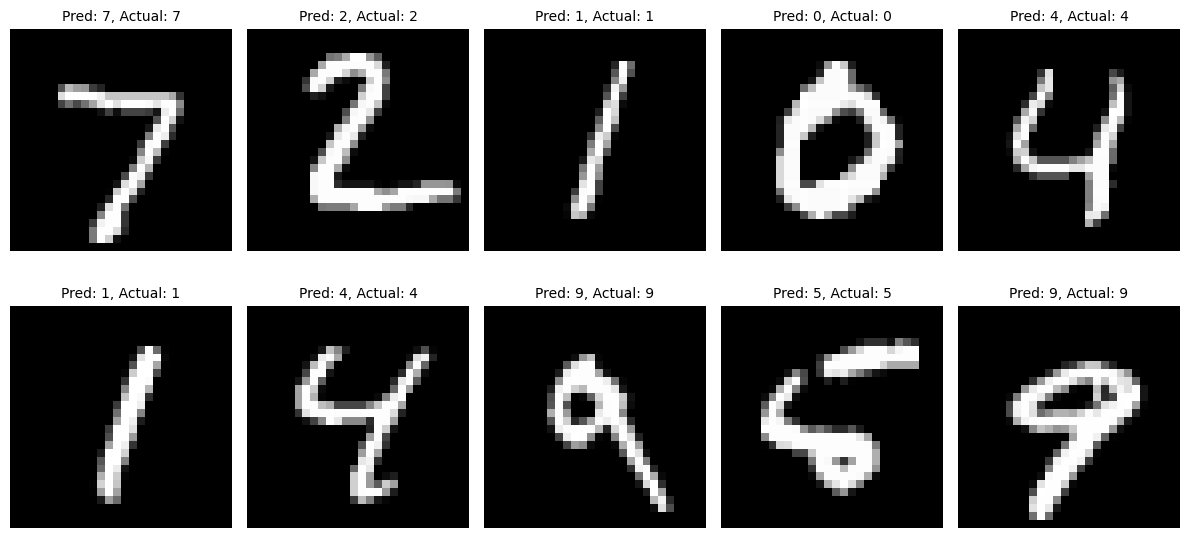

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Make predictions
predictions = model.predict(x_test)

# Display first 10 test images with predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])
    plt.title(f"Pred: {predicted_label}, Actual: {actual_label}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()
